In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [3]:
run start_template.py

<IPython.core.display.Javascript object>


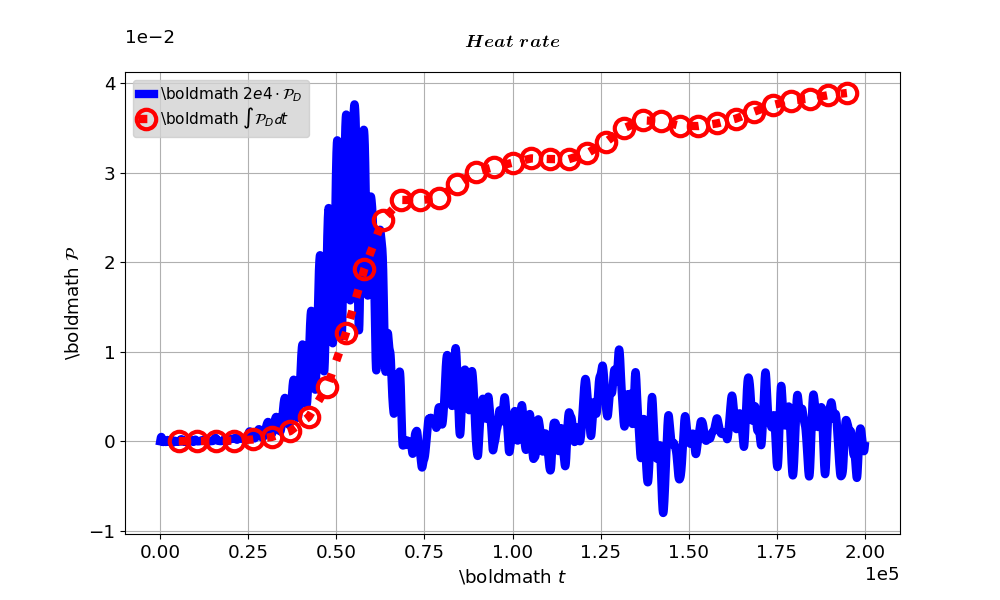

In [20]:
# ****************************************************
# *** INTEGRATION AND MULTIPLICATION ***
# ****************************************************
reload()

# raw signal
ch_signals = GLO.create_signals_dds(
    GLO.def_je_t, 
    [nb025_v35_T025] * 2, 
)

# styling
ff = dict(GLO.DEF_PLOT_FORMAT)
ff.update({
    'xlabel': 't',
    'ylabel': '\mathcal{P}',
    'title': 'Heat\ rate',
    'legends': ['2e4 \cdot \mathcal{P}_D', '\int\mathcal{P}_D\mathcal{d} t'],
    'styles': ['-', 'o:'],
})

# post-processing
pps_var1 = [{'operation': 'mult', 'coef': 0.2e5}]
pps_var2 = [{'operation': 'integration-accumulation', 'width': 5268.358, 'domain': [0.0e5, 2.0e5]}]
postprocessing = [pps_var1, pps_var2]

# plotting
oo = {
    'signals': ch_signals,
    'ff': ff,
    'oo_postprocessing': postprocessing,
    'x_end': 2e5,
}
common.plot_vars_1d(oo)

<IPython.core.display.Javascript object>


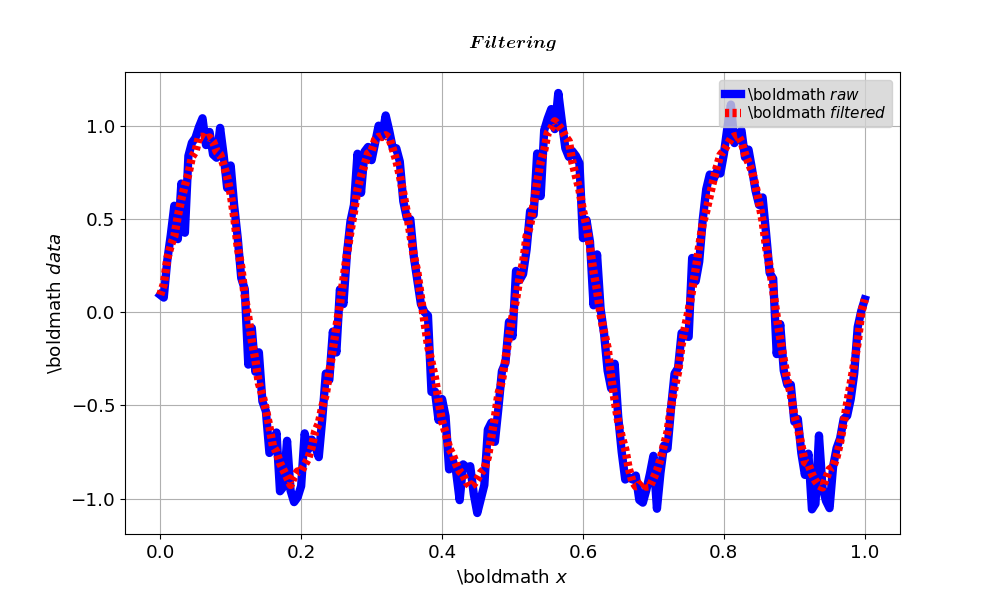

In [25]:
# ****************************************************
# *** Filtering ***
# ****************************************************
reload()

# create signal
import numpy as np
x = np.linspace(0, 1, 201)
T = 0.25
data = np.sin(2*np.pi/T * x) + np.random.normal(0,0.1,len(x))

ch_signal = {
    'type': 'arbitrary',
    'plane': 'xnone',
    'avr_operation': 'none-',
    'data': data,
    'x': x,
}

# styling
ff = dict(GLO.DEF_PLOT_FORMAT)
ff.update({
    'xlabel': 'x',
    'ylabel': 'data',
    'title': 'Filtering',
    'legends': ['raw', 'filtered'],
    'styles': ['-', ':'],
})

# post-processing
pps_var1 = None

oo_filt = GLO.DEF_FILTER_SMOOTH
oo_filt['oo_filters'][0]['wind'] = 7  # have to be ODD
pps_var2 = [oo_filt]

postprocessing = [pps_var1, pps_var2]

# plotting
oo = {
    'signals': [ch_signal] * 2,
    'ff': ff,
    'oo_postprocessing': postprocessing,
}
common.plot_vars_1d(oo)